# Exploring the Dataset
Let us go ahead and import one of the given pickle files from the 
data set and see what all they gave us as labels 
(though, I think we want to do some unsupervised learning). 

Along the way, we can figure out what the data means and how to work with it.

In [1]:
import pickle
import numpy as np
import pandas as pd

# Assigning Path for global classifier

In [2]:
wesad_base_directory = 'data/WESAD/'
dirnames = ['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17']
subjects_data = {}

# Loop through all subjects from S2 to S17
for dirname in dirnames:
    subject_path = wesad_base_directory + dirname + '/' + dirname + '.pkl'
    
    with open(subject_path, 'rb') as file:
        print(f"read files from {dirname}")
        subjects_data[dirname] = pickle.load(file, encoding='latin1')

read files from S2
read files from S3
read files from S4
read files from S5
read files from S6
read files from S7
read files from S8
read files from S9
read files from S10
read files from S11
read files from S13
read files from S14
read files from S15
read files from S16
read files from S17


In [3]:
subjects_data

{'S2': {'signal': {'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
           [ 0.92579997, -0.2216    , -0.55379999],
           [ 0.90820003, -0.21960002, -0.53920001],
           ...,
           [ 0.87179995, -0.12379998, -0.30419999],
           [ 0.87300003, -0.12339997, -0.30260003],
           [ 0.87020004, -0.12199998, -0.30220002]]),
    'ECG': array([[ 0.02142334],
           [ 0.02032471],
           [ 0.01652527],
           ...,
           [-0.00544739],
           [ 0.00013733],
           [ 0.0040741 ]]),
    'EMG': array([[-0.00444031],
           [ 0.00434875],
           [ 0.00517273],
           ...,
           [-0.01716614],
           [-0.02897644],
           [-0.02357483]]),
    'EDA': array([[5.25054932],
           [5.26733398],
           [5.24330139],
           ...,
           [0.36048889],
           [0.36582947],
           [0.365448  ]]),
    'Temp': array([[30.120758],
           [30.129517],
           [30.138214],
           ...,
     

# Loading data from pickle file

In [4]:
w_ax = np.array([])
w_ay = np.array([])
w_az = np.array([])
w_bvp = np.array([])
w_eda = np.array([])
w_temp = np.array([])
w_label = np.array([])

for dirname in dirnames:
    print(f"adding data from {dirname}")
    data = subjects_data[dirname]

    w_ax = np.append(w_ax, data['signal']['wrist']['ACC'][0:, 0])
    w_ay = np.append(w_ay, data['signal']['wrist']['ACC'][0:, 1])
    w_az = np.append(w_az, data['signal']['wrist']['ACC'][0:, 2])
    w_bvp = np.append(w_bvp, data['signal']['wrist']['BVP'][:, 0])
    w_eda = np.append(w_eda, data['signal']['wrist']['EDA'][:, 0])
    w_temp = np.append(w_temp, data['signal']['wrist']['TEMP'][:, 0])
    w_label = np.append(w_label, data['label'])

adding data from S2
adding data from S3
adding data from S4
adding data from S5
adding data from S6
adding data from S7
adding data from S8
adding data from S9
adding data from S10
adding data from S11
adding data from S13
adding data from S14
adding data from S15
adding data from S16
adding data from S17


# Labels given in data set

baseline_indices 12327702
stress_indices 6976201
amusement_indices 3902501


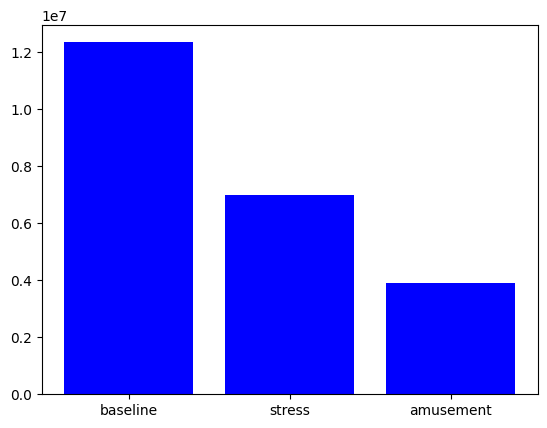

In [12]:
baseline_indices = np.count_nonzero(w_label == 1)
stress_indices = np.count_nonzero(w_label == 2)
amusement_indices = np.count_nonzero(w_label == 3)

print("baseline_indices", baseline_indices)
print("stress_indices", stress_indices)
print("amusement_indices", amusement_indices)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)  # this will create an axis that spans the entire figure

langs = ["baseline", "stress", "amusement"]
y_ax = [baseline_indices, stress_indices, amusement_indices]

ax.bar(langs, y_ax, color='b')

fig.savefig('f1.png')
plt.show()

non_stress_indices 53831399
stress_indices 6976201


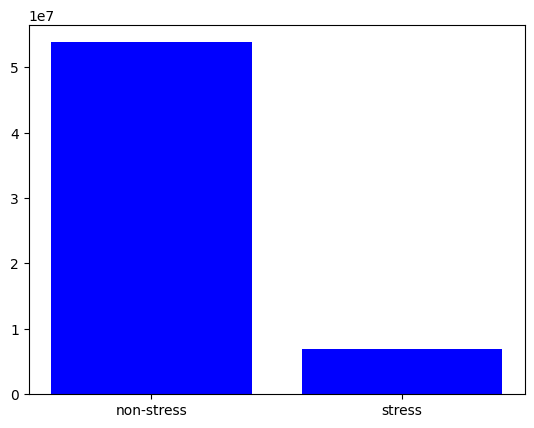

In [13]:
non_stress_indices = np.count_nonzero(w_label != 2)
stress_indices = np.count_nonzero(w_label == 2)

print("non_stress_indices", non_stress_indices)
print("stress_indices", stress_indices)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)  # this will create an axis that spans the entire figure

langs = ["non-stress", "stress"]
y_ax = [non_stress_indices, stress_indices]

ax.bar(langs, y_ax, color='b')

fig.savefig('graphs/f2.png')
plt.show()

In [18]:
numpy_data2=np.array([w_ax,w_ay,w_az])
numpy_data3=np.array([w_bvp])
numpy_data4=np.array([w_eda])
numpy_data5=np.array([w_temp])

numpy_data2=numpy_data2.T
numpy_data3=numpy_data3.T
numpy_data4=numpy_data4.T
numpy_data5=numpy_data5.T

df2 = pd.DataFrame(data=numpy_data2, columns=["w_ax","w_ay","w_az"])
df3 = pd.DataFrame(data=numpy_data3, columns=["w_bvp"]) 
df4 = pd.DataFrame(data=numpy_data4, columns=["w_eda"]) 
df5 = pd.DataFrame(data=numpy_data5, columns=["w_temp"]) 

<Axes: >

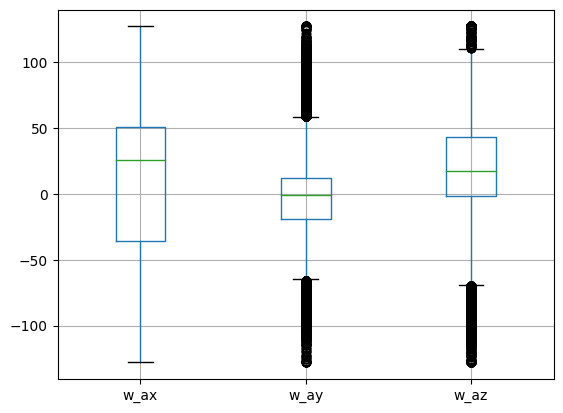

In [19]:
df2.boxplot(column=["w_ax","w_ay","w_az"])

<Axes: >

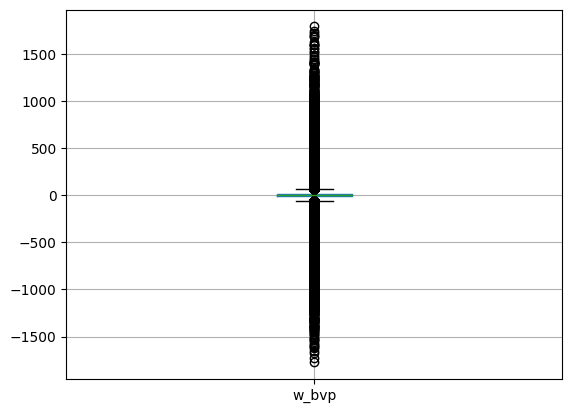

In [20]:
df3.boxplot(column=["w_bvp"])

<Axes: >

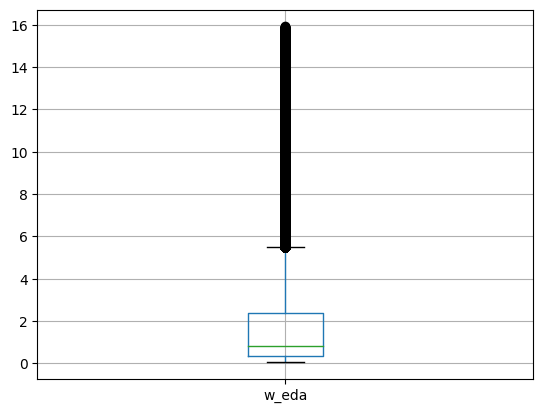

In [21]:
df4.boxplot(column=["w_eda"])

<Axes: >

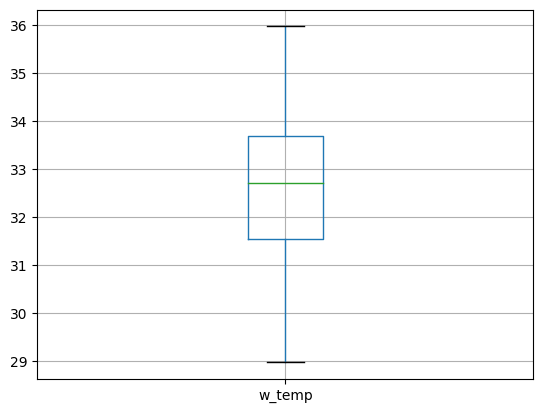

In [22]:
df5.boxplot(column=["w_temp"])

array([[<Axes: title={'center': 'w_ax'}>,
        <Axes: title={'center': 'w_ay'}>],
       [<Axes: title={'center': 'w_az'}>, <Axes: >]], dtype=object)

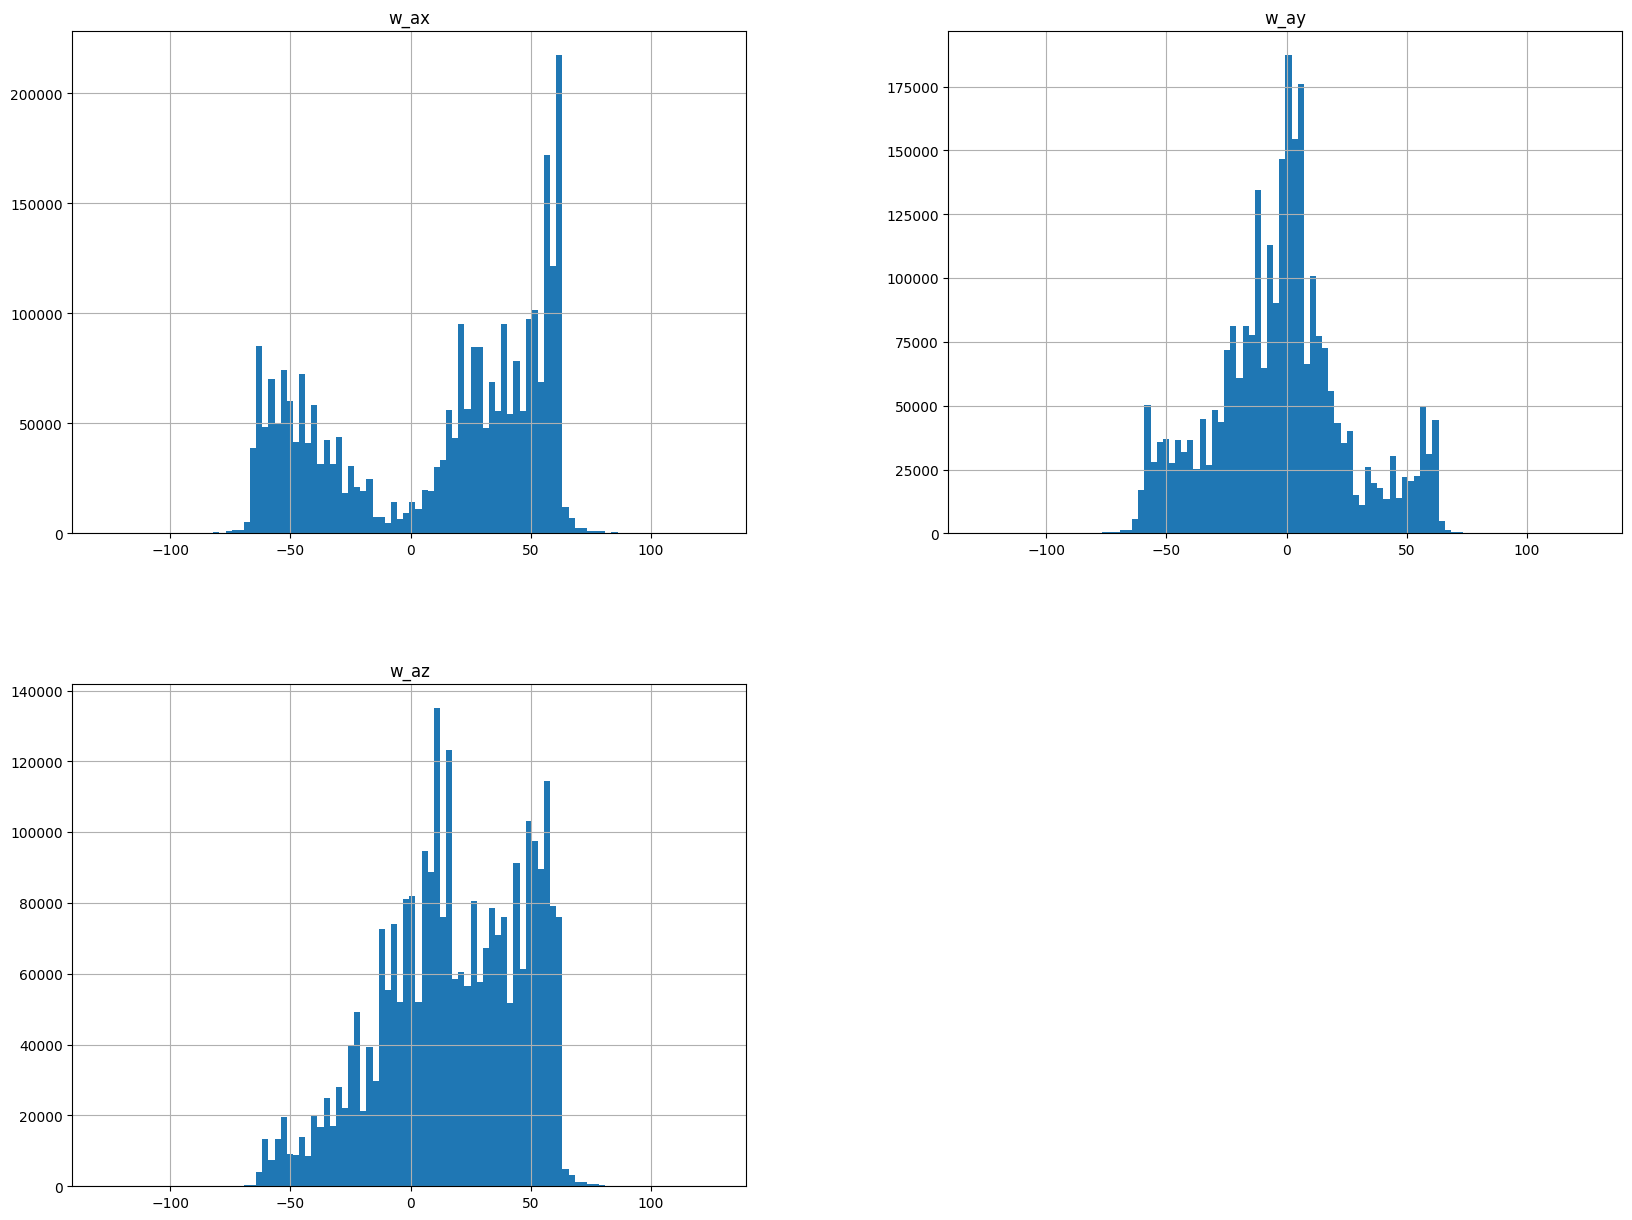

In [23]:
df2.hist(bins=100, figsize = (20,15))

array([[<Axes: title={'center': 'w_bvp'}>]], dtype=object)

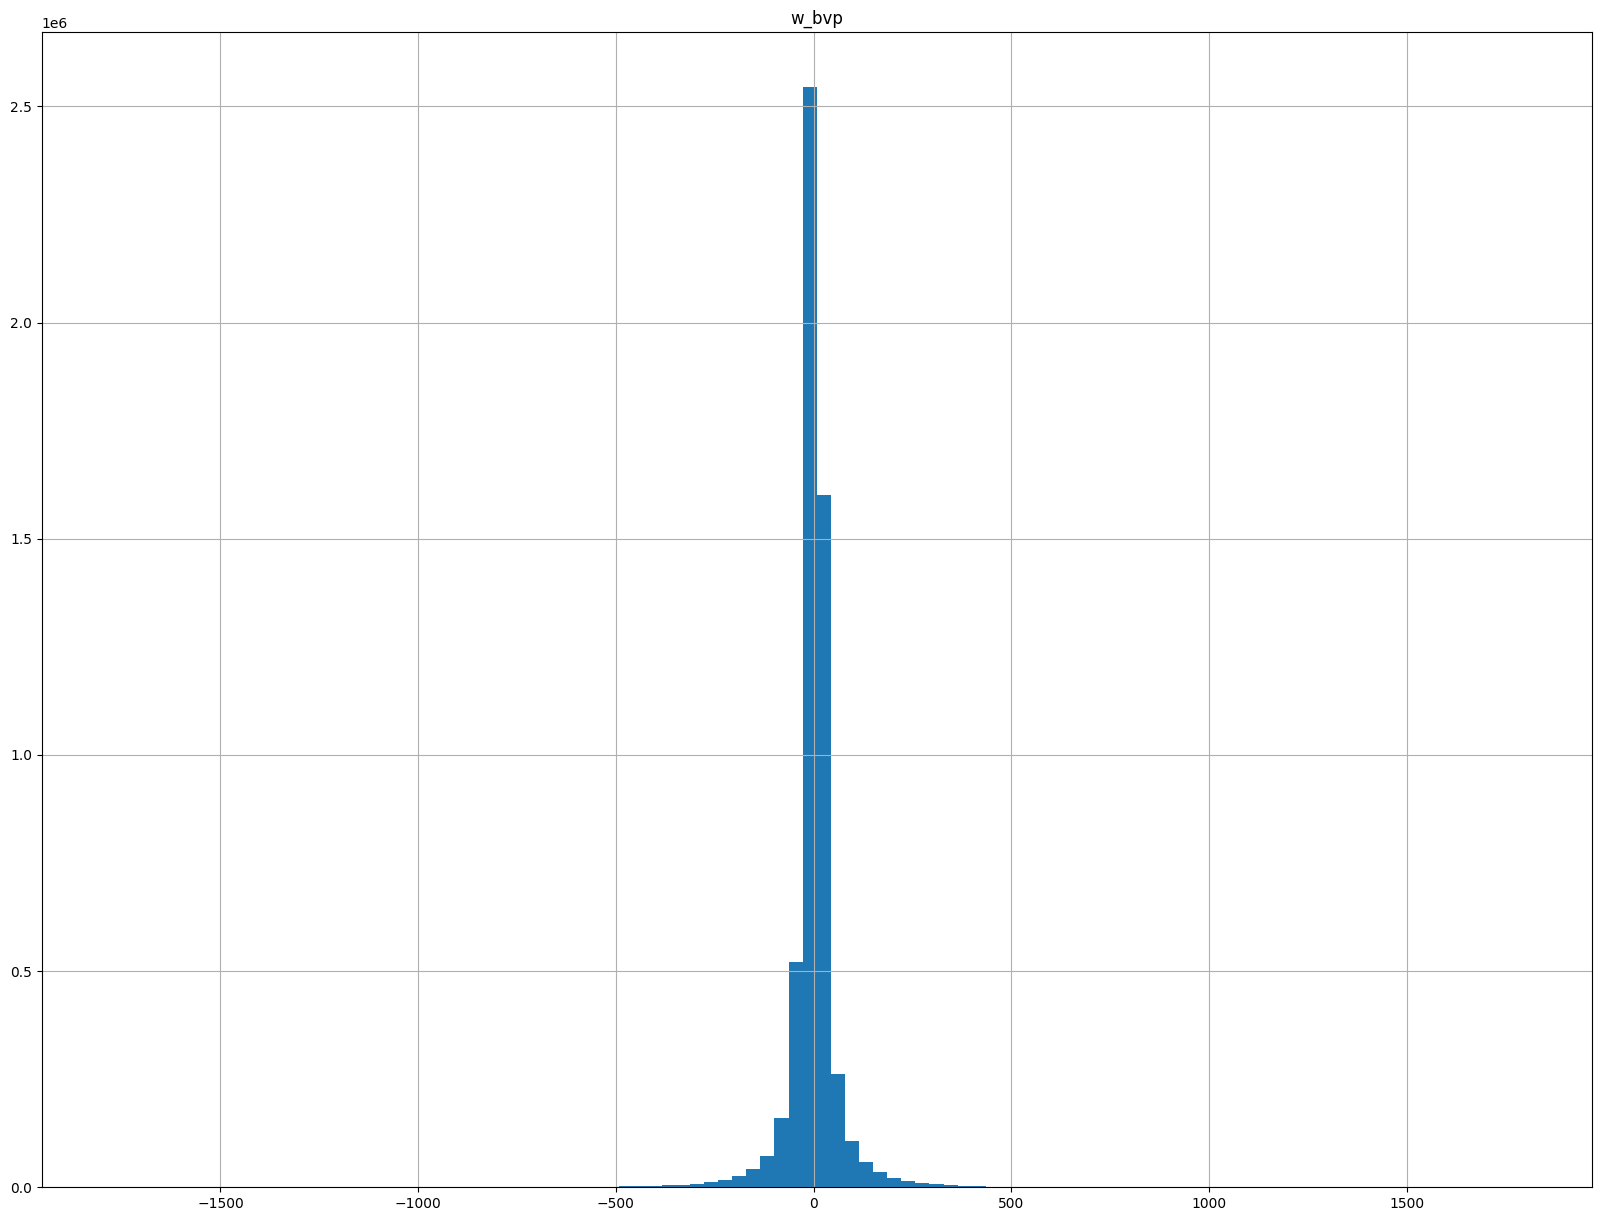

In [24]:
df3.hist(bins=100, figsize = (20,15))

array([[<Axes: title={'center': 'w_eda'}>]], dtype=object)

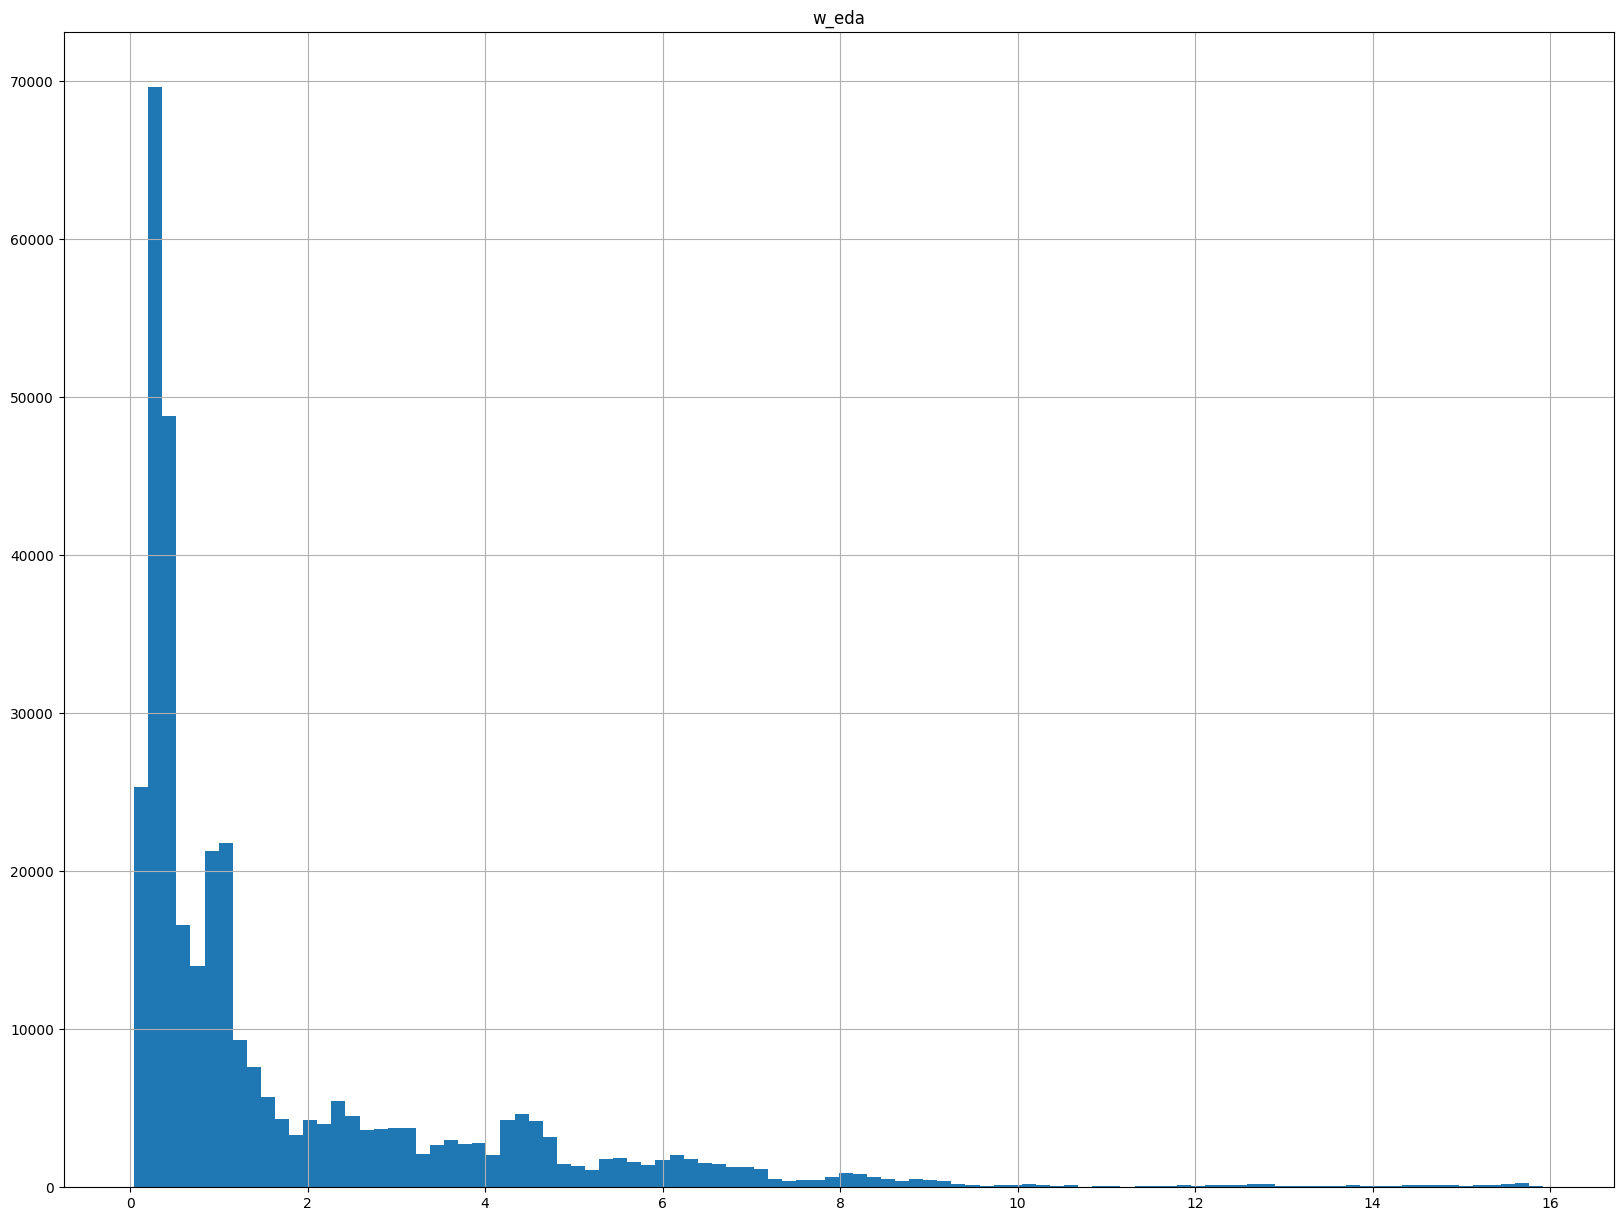

In [25]:
df4.hist(bins=100, figsize = (20,15))

array([[<Axes: title={'center': 'w_temp'}>]], dtype=object)

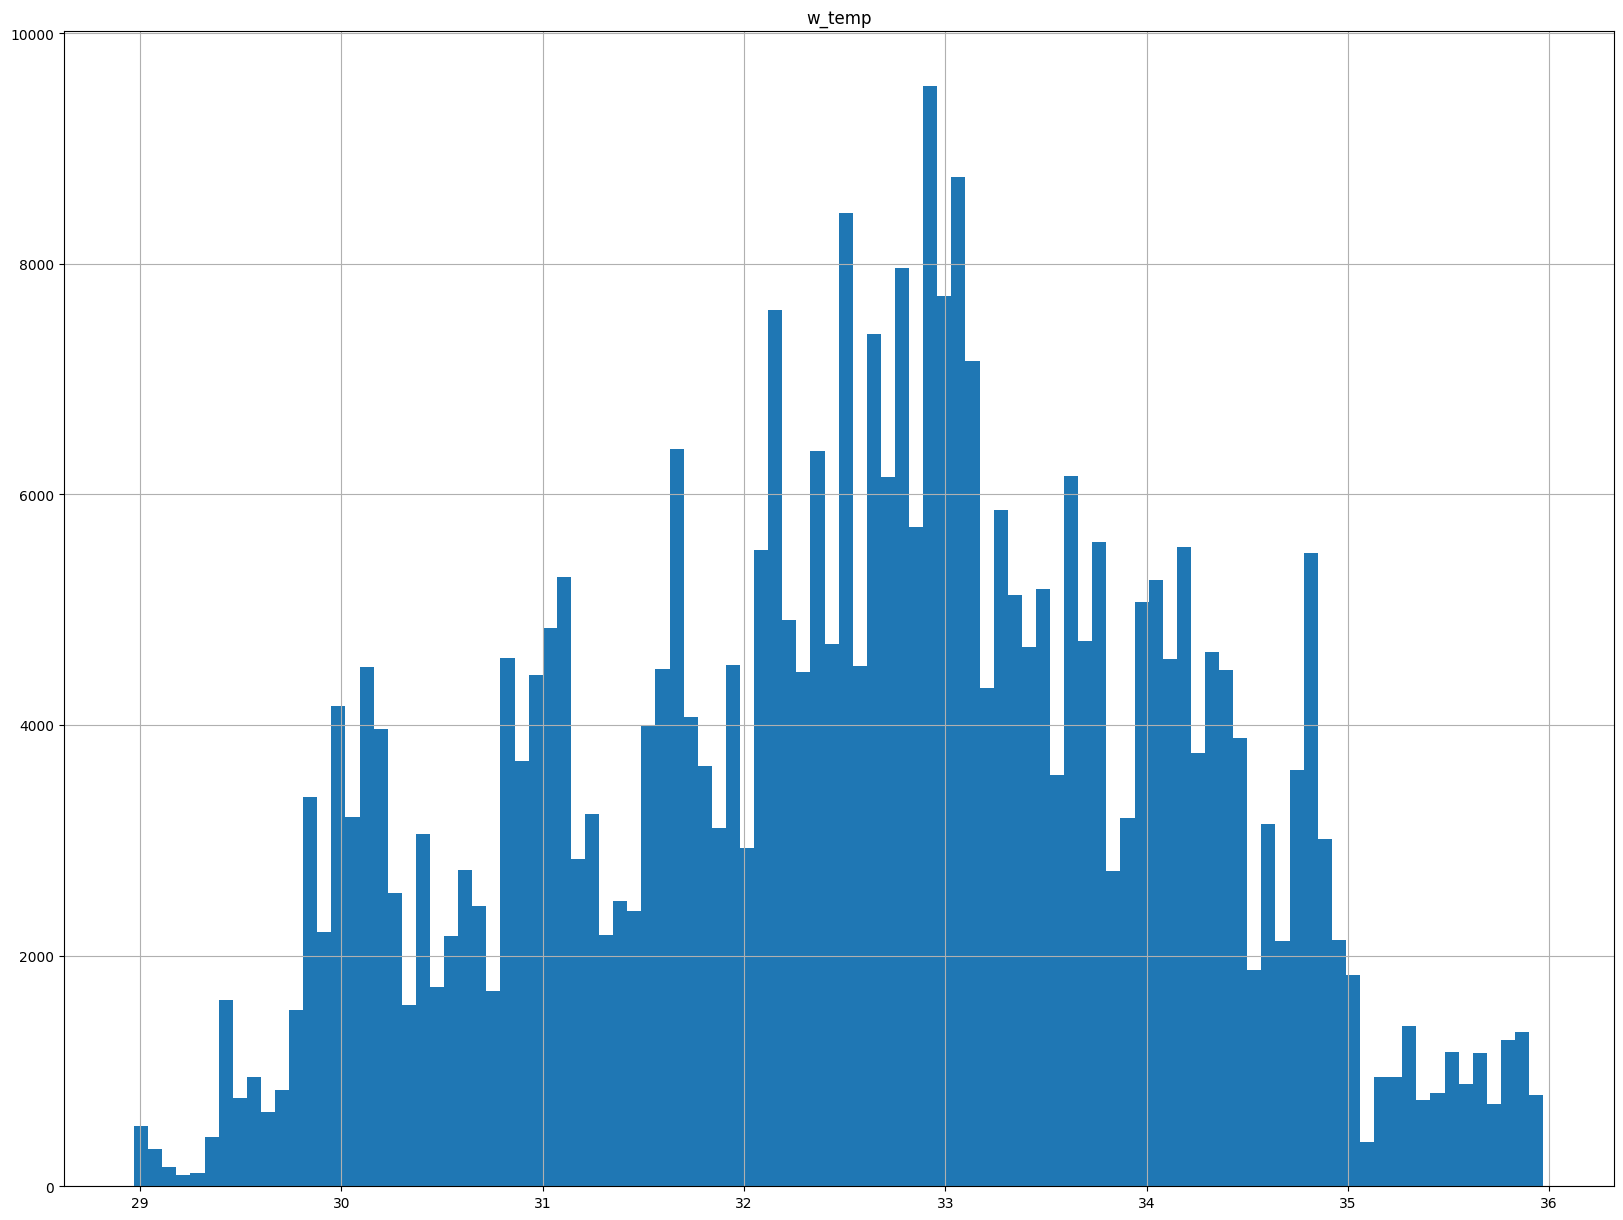

In [26]:
df5.hist(bins=100, figsize = (20,15))